# topic Modeling - LDA(Latent Dirichlet Allocation)

In [4]:
import pandas as pd
import urllib.request
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [18]:
# urllib.request.urlretrieve("https://github.com/ukairia777/tensorflow-nlp-tutorial/tree/main/19.%20Topic%20Modeling%20(LDA%2C%20BERT-Based)/dataset/abcnews-date-text.csv",
#                            filename="abcnews-date-text.csv")


('abcnews-date-text.csv', <http.client.HTTPMessage at 0x25ae2010100>)

In [20]:
data = pd.read_csv('data/abcnews-date-text.csv', on_bad_lines='skip')
data

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1082163,20170630,when is it ok to compliment a womans smile a g...
1082164,20170630,white house defends trumps tweet
1082165,20170630,winter closes in on tasmania as snow ice falls
1082166,20170630,womens world cup australia wins despite atapat...


In [21]:
text = data[['headline_text']]
text.head(5)

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


### preprocessing

In [24]:
text['headline_text'] = text.apply(lambda x: nltk.word_tokenize(x['headline_text']), axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_34524\1218200368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text.apply(lambda x: nltk.word_tokenize(x['headline_text']), axis=1)


In [25]:
# tokenizing 확인

text.head(5)

,headline_text
0,"[aba, decides, against, community, broadcastin..."
1,"[act, fire, witnesses, must, be, aware, of, de..."
2,"[a, g, calls, for, infrastructure, protection,..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


In [27]:
# 불용어 제거

stop_words = stopwords.words('english')
text['headline_text'].apply(lambda x: [word for word in x if word not in stop_words])

0           [aba, decides, community, broadcasting, licence]
1            [act, fire, witnesses, must, aware, defamation]
2             [g, calls, infrastructure, protection, summit]
3                  [air, nz, staff, aust, strike, pay, rise]
4          [air, nz, strike, affect, australian, travellers]
                                 ...                        
1082163               [ok, compliment, womans, smile, guide]
1082164               [white, house, defends, trumps, tweet]
1082165         [winter, closes, tasmania, snow, ice, falls]
1082166    [womens, world, cup, australia, wins, despite,...
1082167         [youtube, stunt, death, foreshadowed, tweet]
Name: headline_text, Length: 1082168, dtype: object

In [28]:
text.head(5)

,headline_text
0,"[aba, decides, against, community, broadcastin..."
1,"[act, fire, witnesses, must, be, aware, of, de..."
2,"[a, g, calls, for, infrastructure, protection,..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


In [31]:
# stemming (표제어 추출)

text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
text.head(5)

C:\Users\PC\AppData\Local\Temp\ipykernel_34524\2861447876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])


,headline_text
0,"[aba, decide, against, community, broadcast, l..."
1,"[act, fire, witness, must, be, aware, of, defa..."
2,"[a, g, call, for, infrastructure, protection, ..."
3,"[air, nz, staff, in, aust, strike, for, pay, r..."
4,"[air, nz, strike, to, affect, australian, trav..."


In [33]:
# 길이 3이하 제거

tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word)>3])
tokenized_doc[:5]

0    [decide, against, community, broadcast, licence]
1            [fire, witness, must, aware, defamation]
2          [call, infrastructure, protection, summit]
3                         [staff, aust, strike, rise]
4            [strike, affect, australian, travellers]
Name: headline_text, dtype: object

### TF-IDF matrix

In [85]:
detokenized_doc  = []

for i in range(len(text)):
    tmp = ' '.join(tokenized_doc[i])
    detokenized_doc.append(tmp)
    
text['headline_text'] = detokenized_doc

C:\Users\PC\AppData\Local\Temp\ipykernel_34524\1668883173.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['headline_text'] = detokenized_doc


In [86]:
text['headline_text'][:5]

0    decide against community broadcast licence
1            fire witness must aware defamation
2         call infrastructure protection summit
3                        staff aust strike rise
4           strike affect australian travellers
Name: headline_text, dtype: object

In [89]:
# 상위 1,000개 단어 보존

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text['headline_text'])

print(X.shape)

(1082168, 1000)


    -> 1,082,168 X 1,000 의 크기를 가진 TF-IDF 행렬 생성

In [76]:
vectorizer.vocabulary_

{'decide': 255,
 'community': 191,
 'licence': 521,
 'witness': 981,
 'infrastructure': 457,
 'protection': 678,
 'summit': 858,
 'staff': 833,
 'aust': 59,
 'strike': 847,
 'rise': 745,
 'affect': 16,
 'australian': 61,
 'jump': 486,
 'record': 707,
 'break': 112,
 'aussie': 57,
 'waste': 962,
 'match': 551,
 'address': 13,
 'security': 782,
 'council': 213,
 'iraq': 469,
 'australia': 60,
 'million': 563,
 'celebrate': 150,
 'plan': 629,
 'ahead': 22,
 'boost': 105,
 'water': 964,
 'supply': 860,
 'unite': 936,
 'state': 838,
 'dismiss': 274,
 'report': 724,
 'troop': 925,
 'british': 116,
 'arrive': 48,
 'lead': 508,
 'double': 279,
 'bushfire': 125,
 'victims': 946,
 'urge': 943,
 'businesses': 127,
 'prepare': 656,
 'attack': 54,
 'final': 342,
 'defeat': 258,
 'fuel': 371,
 'leave': 515,
 'miss': 567,
 'fund': 372,
 'bank': 74,
 'home': 429,
 'help': 416,
 'youth': 996,
 'chief': 160,
 'fail': 321,
 'secure': 781,
 'councillor': 214,
 'protect': 677,
 'heritage': 417,
 'welcome':

In [105]:
word2id = {k:v for k,v in vectorizer.vocabulary_.items()}
id2word = {v:k for k,v in vectorizer.vocabulary_.items()}

{255: 'decide',
 191: 'community',
 521: 'licence',
 981: 'witness',
 457: 'infrastructure',
 678: 'protection',
 858: 'summit',
 833: 'staff',
 59: 'aust',
 847: 'strike',
 745: 'rise',
 16: 'affect',
 61: 'australian',
 486: 'jump',
 707: 'record',
 112: 'break',
 57: 'aussie',
 962: 'waste',
 551: 'match',
 13: 'address',
 782: 'security',
 213: 'council',
 469: 'iraq',
 60: 'australia',
 563: 'million',
 150: 'celebrate',
 629: 'plan',
 22: 'ahead',
 105: 'boost',
 964: 'water',
 860: 'supply',
 936: 'unite',
 838: 'state',
 274: 'dismiss',
 724: 'report',
 925: 'troop',
 116: 'british',
 48: 'arrive',
 508: 'lead',
 279: 'double',
 125: 'bushfire',
 946: 'victims',
 943: 'urge',
 127: 'businesses',
 656: 'prepare',
 54: 'attack',
 342: 'final',
 258: 'defeat',
 371: 'fuel',
 515: 'leave',
 567: 'miss',
 372: 'fund',
 74: 'bank',
 429: 'home',
 416: 'help',
 996: 'youth',
 160: 'chief',
 321: 'fail',
 781: 'secure',
 214: 'councillor',
 677: 'protect',
 417: 'heritage',
 969: 'welc

### topic-modeling

In [41]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',
                                    random_state=2023, max_iter=1)

In [42]:
lda_top = lda_model.fit_transform(X)

array([[0.03669227, 0.03669227, 0.03669227, ..., 0.03669227, 0.03669227,
        0.03669227],
       [0.05      , 0.05      , 0.55      , ..., 0.05      , 0.05      ,
        0.05      ],
       [0.03660966, 0.03660966, 0.03660966, ..., 0.03660966, 0.03660966,
        0.03660966],
       ...,
       [0.24045712, 0.03663014, 0.03663014, ..., 0.03663014, 0.03663014,
        0.26244076],
       [0.03354632, 0.03354632, 0.03354632, ..., 0.18411343, 0.34811119,
        0.23295112],
       [0.05      , 0.05      , 0.05      , ..., 0.05      , 0.05      ,
        0.05      ]])

In [43]:
print(lda_model.components_)
print(lda_model.components_.shape)

[[1.00002768e-01 1.00001179e-01 1.00003410e-01 ... 1.00004347e-01
  1.00005192e-01 7.53381832e+02]
 [1.00003106e-01 1.00001492e-01 1.00007295e-01 ... 1.00002401e-01
  1.00001259e-01 1.00003213e-01]
 [1.00000242e-01 1.00000998e-01 1.00002530e-01 ... 1.00005195e-01
  1.00003099e-01 1.00003518e-01]
 ...
 [1.00002126e-01 1.13513398e+03 1.00013992e-01 ... 1.77619511e+03
  1.50652744e+02 1.00003544e-01]
 [1.00003141e-01 1.00000934e-01 3.50170828e+03 ... 1.00007141e-01
  1.00001648e-01 1.00004624e-01]
 [1.00002127e-01 1.00000954e-01 1.00003729e-01 ... 1.00006757e-01
  1.00002244e-01 1.00005874e-01]]
(10, 1000)


In [47]:
# 단어 집합

terms = vectorizer.get_feature_names_out()
terms

array(['2013', '2014', '2015', '2016', 'abbott', 'aboriginal', 'abuse',
       'accc', 'accept', 'access', 'accident', 'accuse', 'action',
       'address', 'adelaide', 'admit', 'affect', 'afghan', 'afghanistan',
       'africa', 'agree', 'agreement', 'ahead', 'airport', 'alcohol',
       'alert', 'alice', 'allegations', 'allege', 'allow', 'ambulance',
       'amid', 'andrew', 'anger', 'angry', 'animal', 'announce', 'answer',
       'anti', 'anzac', 'apologise', 'appeal', 'appoint', 'approval',
       'approve', 'april', 'army', 'arrest', 'arrive', 'asbestos', 'asia',
       'asian', 'assault', 'asylum', 'attack', 'attempt', 'august',
       'aussie', 'aussies', 'aust', 'australia', 'australian',
       'australians', 'australias', 'authorities', 'avoid', 'await',
       'award', 'away', 'baby', 'baghdad', 'bail', 'bali', 'bangladesh',
       'bank', 'base', 'bash', 'battle', 'beach', 'beat', 'beattie',
       'beef', 'begin', 'bendigo', 'benefit', 'best', 'better', 'bike',
       'bik

In [118]:
lda_model.components_

array([[1.00002768e-01, 1.00001179e-01, 1.00003410e-01, ...,
        1.00004347e-01, 1.00005192e-01, 7.53381832e+02],
       [1.00003106e-01, 1.00001492e-01, 1.00007295e-01, ...,
        1.00002401e-01, 1.00001259e-01, 1.00003213e-01],
       [1.00000242e-01, 1.00000998e-01, 1.00002530e-01, ...,
        1.00005195e-01, 1.00003099e-01, 1.00003518e-01],
       ...,
       [1.00002126e-01, 1.13513398e+03, 1.00013992e-01, ...,
        1.77619511e+03, 1.50652744e+02, 1.00003544e-01],
       [1.00003141e-01, 1.00000934e-01, 3.50170828e+03, ...,
        1.00007141e-01, 1.00001648e-01, 1.00004624e-01],
       [1.00002127e-01, 1.00000954e-01, 1.00003729e-01, ...,
        1.00006757e-01, 1.00002244e-01, 1.00005874e-01]])

In [56]:
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print(f"topic : {idx+1} , {[(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n-1:-1]]}")



In [57]:
get_topics(lda_model.components_, terms)

topic : 1 , [('government', 8725.19), ('charge', 8428.8), ('murder', 6268.13), ('home', 5674.38), ('years', 5080.75)]
topic : 2 , [('queensland', 7720.12), ('melbourne', 7528.43), ('south', 6677.03), ('perth', 6456.53), ('fund', 4693.03)]
topic : 3 , [('police', 12092.44), ('court', 7542.74), ('woman', 5456.76), ('coast', 5429.41), ('face', 5193.63)]
topic : 4 , [('death', 5927.4), ('change', 5874.27), ('year', 5586.42), ('market', 5545.86), ('school', 5465.06)]
topic : 5 , [('sydney', 8393.29), ('warn', 5115.01), ('turnbull', 4269.85), ('rise', 4040.67), ('hour', 3635.2)]
topic : 6 , [('trump', 11966.41), ('canberra', 6112.23), ('open', 5663.0), ('state', 4923.41), ('miss', 4546.98)]
topic : 7 , [('election', 7561.63), ('adelaide', 6758.36), ('make', 5658.99), ('tasmanian', 4859.02), ('brisbane', 4857.21)]
topic : 8 , [('attack', 6959.64), ('world', 6707.7), ('kill', 5851.6), ('report', 5611.33), ('live', 5488.62)]
topic : 9 , [('australia', 13691.08), ('house', 6113.49), ('interview'

In [73]:
for topic, com in enumerate(lda_model.components_)

array(['latentdirichletallocation0', 'latentdirichletallocation1',
       'latentdirichletallocation2', 'latentdirichletallocation3',
       'latentdirichletallocation4', 'latentdirichletallocation5',
       'latentdirichletallocation6', 'latentdirichletallocation7',
       'latentdirichletallocation8', 'latentdirichletallocation9'],
      dtype=object)

In [111]:
vectorizer

TfidfVectorizer(max_features=1000, stop_words='english')

array([[1.00002768e-01, 1.00001179e-01, 1.00003410e-01, ...,
        1.00004347e-01, 1.00005192e-01, 7.53381832e+02],
       [1.00003106e-01, 1.00001492e-01, 1.00007295e-01, ...,
        1.00002401e-01, 1.00001259e-01, 1.00003213e-01],
       [1.00000242e-01, 1.00000998e-01, 1.00002530e-01, ...,
        1.00005195e-01, 1.00003099e-01, 1.00003518e-01],
       ...,
       [1.00002126e-01, 1.13513398e+03, 1.00013992e-01, ...,
        1.77619511e+03, 1.50652744e+02, 1.00003544e-01],
       [1.00003141e-01, 1.00000934e-01, 3.50170828e+03, ...,
        1.00007141e-01, 1.00001648e-01, 1.00004624e-01],
       [1.00002127e-01, 1.00000954e-01, 1.00003729e-01, ...,
        1.00006757e-01, 1.00002244e-01, 1.00005874e-01]])

In [58]:
import pyLDAvis.gensim_models

In [120]:
from textacy.tm import TopicModel

C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\framework\dtypes.py:246: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
C:\Users\PC\AppData\Roaming\Python\Python39\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:326: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [126]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

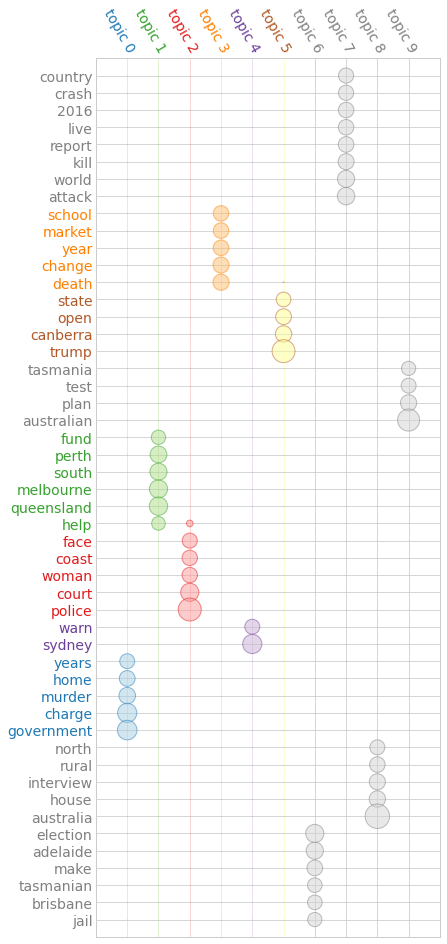

In [128]:
tm = TopicModel(lda_model, n_topics=5)
    
#     logging.info("Making termite plot…")
plt.figure()
    
tm.termite_plot(
    doc_term_matrix=tm.model.components_,
    id2term=id2word,
    topics=-1,
    n_terms=50,
    rank_terms_by="topic_weight",
    highlight_topics=list(range(6)),
)

plt.tight_layout()
    
#     plt.savefig(save_dir)
#     logging.info(f"\tTermite (topic importance) plot saved to {save_dir}")

In [129]:
def cal_ppl(n_topics, tfidf_result, lda_param):
        lda_params_cp = lda_param.copy()
        
        lda_param["n_components"] = n_topics
        lda = LatentDirichletAllocation(**lda_params_cp)
        lda.fit(tfidf_result)
        lda_out = lda.transform(tfidf_result)
        
        return lda.perplexity(tfidf_result)

def plot_perplexity(param, tfidf_result, save_dir):
    logging.info("Making perplexity plot...")
    
    with Pool() as p:
        ppl = list(
            p.imap(partial(cal_ppl, tfidf_result=tfidf_result, lda_param=param), range(5,25))
        )
        
    plt.figure(figsize=(4, 4))
    plt.plot(ppl)
    plt.xlabel("Number of topics")
    plt.ylabel("Perplexity")
    plt.savefig(save_dir)
    logging.info(f"\tPerplexity plot saved to {save_dir}")